In [ ]:
# importing important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import missingno as mn
import seaborn as sns
import datetime

from pandas.plotting import scatter_matrix

#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

#importing packages from sklearn library.
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print("Confusion matrix, without normalisation")
        
    print(cm)
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm [i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Upload training and test datasets

from google.colab import drive
drive.mount('/content/drive')
BC_train = pd.read_csv('/content/drive/My Drive/train_100r.csv')
BC_test = pd.read_csv('/content/drive/My Drive/test_100r.csv')

Mounted at /content/drive


In [ ]:
BC_train = BC_train.drop(['id'], axis='columns')
BC_test = BC_test.drop(['id'], axis='columns')

In [ ]:
X_train = BC_train.values[:,1:31]
y_train = BC_train.diagnosis

X_train_full, X_test, y_train_full, y_test = train_test_split((BC_train.values[:,1:31]), BC_train.diagnosis)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [ ]:
inputs = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "sigmoid",kernel_initializer = "uniform",kernel_constraint=maxnorm(1))(inputs)
dropout = keras.layers.Dropout(0.7)(hidden1)
hidden2 = keras.layers.Dense(15, activation = "sigmoid",kernel_initializer = "uniform",kernel_constraint=maxnorm(1))(dropout)
outputs = keras.layers.Dense(2, activation = "sigmoid")(dropout)
model = keras.Model(inputs = inputs, outputs = outputs)

epochs=10
learning_rate = 0.2
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate, decay = decay_rate, momentum = momentum)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                   optimizer= sgd, metrics = ["accuracy"])

Epoch 1/10
449/449 [==============================] - 3s 5ms/step - loss: 0.0666 - accuracy: 0.9749 - val_loss: 0.0059 - val_accuracy: 0.9979
Epoch 2/10
449/449 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9866 - val_loss: 0.0046 - val_accuracy: 0.9981
Epoch 3/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9877 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 4/10
449/449 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9879 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 5/10
449/449 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9885 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 6/10
449/449 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9911 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 7/10
449/449 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9883 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 

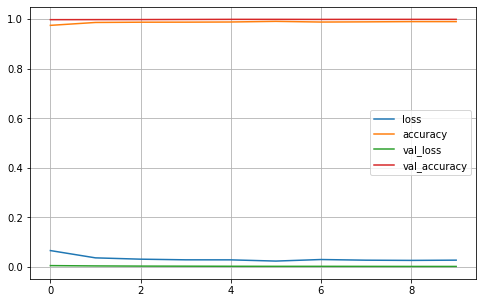

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                         validation_data=(X_valid, y_valid),
                         batch_size = 32,
                         shuffle = True, 
                         verbose=1)

test = model.evaluate(X_test, y_test)
print(test)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
y_pred = model.predict(X_test)
y_predict_class = np.argmax(model.predict(X_test), axis=-1)
y_pred = y_pred[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predict_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predict_class)
print('F1 score: %f' % f1)

Accuracy: 0.998903
Precision: 0.998426
Recall: 0.999370
F1 score: 0.998898


Confusion matrix, without normalisation
[[3202    5]
 [   2 3172]]


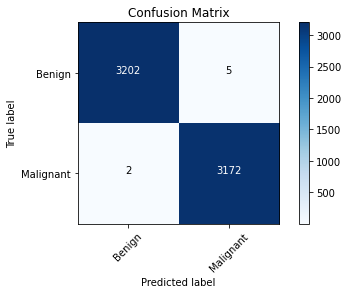

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_predict_class)
cm_plot_labels = ['Benign','Malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['malignant', 'benign']
print(classification_report(y_test, y_predict_class, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.99      0.98      3116
      benign       0.99      0.97      0.98      3265

    accuracy                           0.98      6381
   macro avg       0.98      0.98      0.98      6381
weighted avg       0.98      0.98      0.98      6381



In [ ]:
inputs = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "sigmoid",kernel_initializer = "uniform",kernel_constraint=maxnorm(1))(inputs)
dropout = keras.layers.Dropout(0.7)(hidden1)
hidden2 = keras.layers.Dense(15, activation = "sigmoid",kernel_initializer = "uniform",kernel_constraint=maxnorm(1))(dropout)
concat = keras.layers.Concatenate()([inputs, hidden2])
outputs = keras.layers.Dense(2, activation = "sigmoid")(concat)
model_wide = keras.Model(inputs = inputs, outputs = outputs)

epochs=10
learning_rate = 0.2
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate, decay = decay_rate, momentum = momentum)

model_wide.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                   optimizer= sgd, metrics = ["accuracy"])

Epoch 1/10
449/449 [==============================] - 2s 3ms/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0052 - val_accuracy: 0.9977
Epoch 2/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 3/10
449/449 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 4/10
449/449 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9990
Epoch 5/10
449/449 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 6/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 7/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 

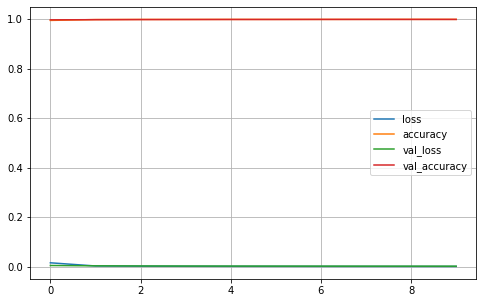

In [ ]:
history = model_wide.fit(X_train, y_train, epochs=10, 
                         validation_data=(X_valid, y_valid),
                         batch_size = 32,
                         shuffle = True, 
                         verbose=1)

test = model_wide.evaluate(X_test, y_test)
print(test)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
y_pred = model_wide.predict(X_test)
y_predict_class = np.argmax(model_wide.predict(X_test), axis=-1)
y_pred = y_pred[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predict_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predict_class)
print('F1 score: %f' % f1)

Accuracy: 0.998433
Precision: 0.997797
Recall: 0.999055
F1 score: 0.998426


Confusion matrix, without normalisation
[[3200    7]
 [   3 3171]]


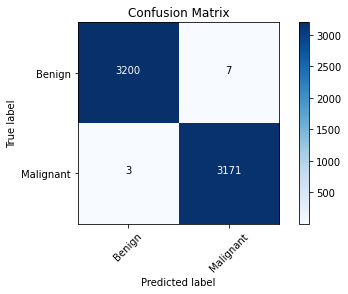

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_predict_class)
cm_plot_labels = ['Benign','Malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model_wide.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['input_2[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 30)           0           ['dense_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 15)           465         ['dropout_1[0][0]']              
                                                                                            

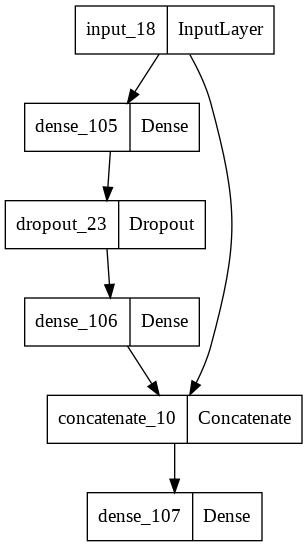

In [ ]:
tf.keras.utils.plot_model(model_wide)

In [ ]:
X_train_wide, X_train_deep = X_train[:,:20:], X_train[:,10:]
X_valid_wide, X_valid_deep = X_valid[:,:20], X_valid[:,10:]
X_test_wide, X_test_deep = X_test[:,:20], X_test[:,10:]

In [ ]:
input_housing_wide = keras.layers.Input(shape=[20], name="wide_input")
input_housing_deep = keras.layers.Input(shape=[20], name="deep_input")
hidden1 = keras.layers.Dense(30, activation = "sigmoid",kernel_initializer = "uniform",kernel_constraint=maxnorm(1), name ="hidden1")(input_housing_deep)
dropout = keras.layers.Dropout(0.7, name = "dropout")(hidden1)
hidden2 = keras.layers.Dense(30, activation = "sigmoid",kernel_initializer = "uniform",kernel_constraint=maxnorm(1), name = "hidden2")(dropout)
concat = keras.layers.Concatenate()([input_housing_wide,hidden2])
output = keras.layers.Dense(2, activation = "sigmoid", name = "output")(concat)
model_wnd = keras.Model(inputs=[input_housing_wide, input_housing_deep], outputs=[output])
model_wnd.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           630         ['deep_input[0][0]']             
                                                                                                  
 dropout (Dropout)              (None, 30)           0           ['hidden1[0][0]']                
                                                                                                  
 wide_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                           

In [ ]:
epochs=10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate, decay = decay_rate, momentum = momentum)

model_wnd.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                   optimizer= sgd, metrics =[keras.metrics.SparseCategoricalAccuracy()])


200/200 [==============================] - 0s 2ms/step - loss: 0.0785 - sparse_categorical_accuracy: 0.9698
[0.07851693034172058, 0.9697539806365967]


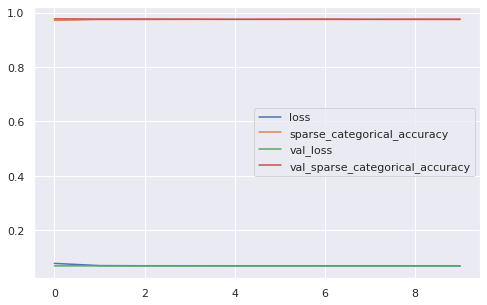

In [ ]:
history = model_wnd.fit([X_train_wide, X_train_deep], [y_train, y_train], epochs=10, 
                         validation_data=([X_valid_wide, X_valid_deep], [y_valid, y_valid]),
                         batch_size = 32,
                         shuffle = True, 
                         verbose=0)

test = model_wnd.evaluate([X_test_wide, X_test_deep], [y_test,y_test])
print(test)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
y_pred = model_wnd.predict([X_test_wide, X_test_deep])
y_predict_class = np.argmax(model_wnd.predict([X_test_wide, X_test_deep]), axis=-1)
# reduce to 1d array
y_pred = y_pred[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predict_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predict_class)
print('F1 score: %f' % f1)

Accuracy: 0.969754
Precision: 0.973490
Recall: 0.967228
F1 score: 0.970349


Confusion matrix, without normalisation
[[3030   86]
 [ 107 3158]]


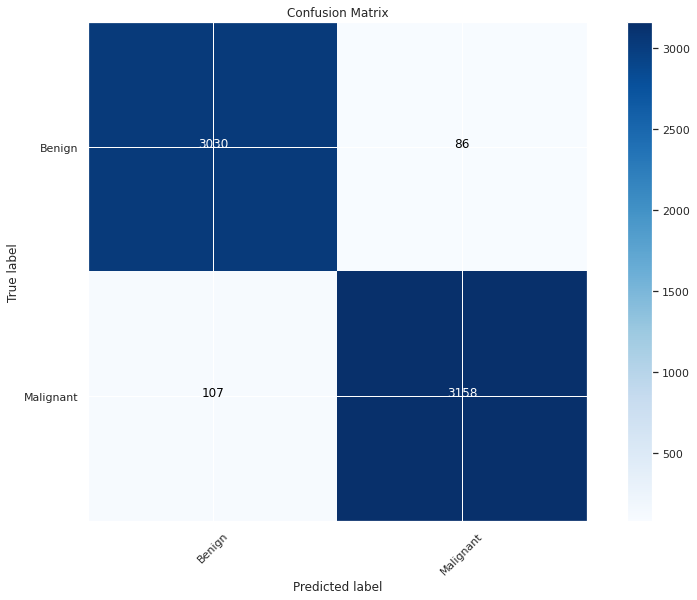

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_predict_class)
cm_plot_labels = ['Benign','Malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model_wnd.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           630         ['deep_input[0][0]']             
                                                                                                  
 dropout (Dropout)              (None, 30)           0           ['hidden1[0][0]']                
                                                                                                  
 wide_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                           

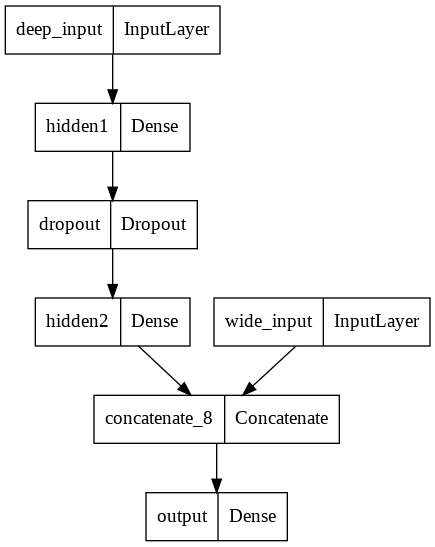

In [ ]:
tf.keras.utils.plot_model(model_wnd)